In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
# Local imports

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

from fields_propagation.functions import cpx_corr
from fields_propagation.fields import laguerre_gauss, hermite_gauss, speckle_gauss
from fields_propagation.fourier_filter import lowpass_filter, fourier_filter
from holograms.dmd_holograms import parallel_lee,  orthogonal_lee, holo_SP, holo_Haskell
from holograms.generate_LUT import generate_lut

from plotting.plot_funs import colorize
from plotting.specialized_functions import plot_holoWzoom, plot_four, plot_fieldWzoom

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 

plt.rcParams.update({"figure.facecolor" : "white"})


# Shaping complex fields

## 1. Define complex fields

In [5]:
Nt = 30
nx = 780 ; ny = 780
hlg_sc= 2*1.1 * np.sqrt(Nt+1)/nx
X,Y = np.meshgrid(np.arange(nx)-nx/2,np.arange(ny)-ny/2)

ws = nx/2
fmax= 1/16#
speckle = speckle_gauss(100,ws*fmax,X/ws,Y/ws)
speckle /= np.max(np.abs(speckle))

lg_field = laguerre_gauss(Nt, -3, hlg_sc*X, hlg_sc*Y)
hg_field = hermite_gauss(Nt, -3, hlg_sc*X, hlg_sc*Y)
lg_field /= np.max(np.abs(lg_field))
hg_field /= np.max(np.abs(hg_field))

field_list = [hg_field, lg_field, speckle]

SA_filters = [1/32,1/32,fmax]

## 2. Aligned holograms ($p_y = 0$)

First we define the period of the grating and compute the LUT 

In [6]:
px = 3
nuvec = np.array((1/px,0)) 
f_val, px_comb, lut = generate_lut('haskell', px)

Then we compute the holograms

In [7]:
holo_list = []
for f in field_list:
    holo_list += [[parallel_lee(f, nuvec=nuvec),
                   orthogonal_lee(f, nuvec=nuvec),
                   holo_Haskell(f, lut, px_comb, ds_method='mean')]]

Then we compute the shaped fields

In [8]:
shaped_list = []
for fi in range(len(field_list)):
    temp_list = []
    for hi in range(3):
        sh_f, _ = fourier_filter(holo_list[fi][hi], nuvec, SA_filters[fi])
        temp_list += [sh_f]
    shaped_list += [temp_list]

Finally we plot the results

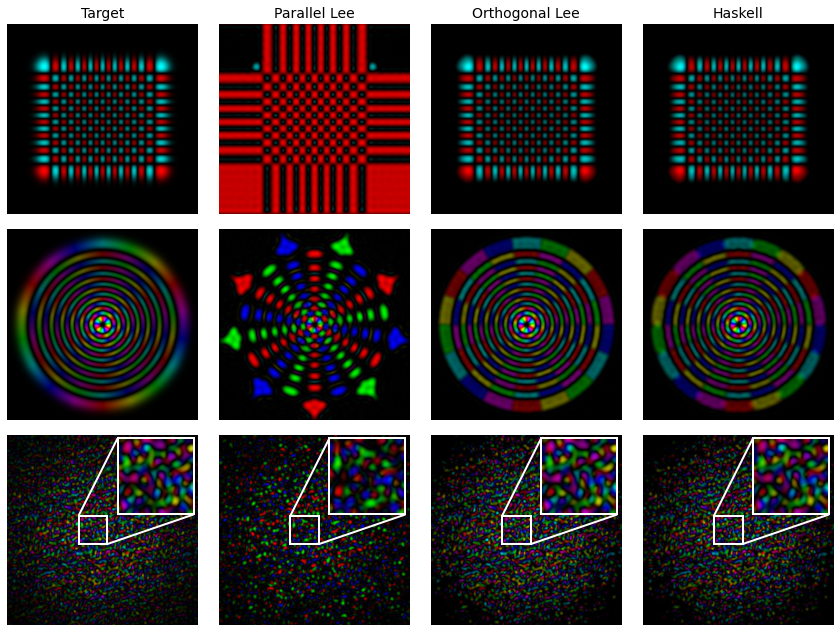

In [10]:
fig, axs = plt.subplots(3,4, figsize=(12,9))
titles = ['Target', 'Parallel Lee', 'Orthogonal Lee', 'Haskell']
for fi in range(3):
    for hi in range(3):
        if fi==0:
            axs[0,hi+1].set_title(titles[hi+1])
        if fi==2:
            plot_fieldWzoom(shaped_list[fi][hi], ax=axs[fi,hi+1], rz=0.075, xyzoom=[0.45,0.5])
        else:
            axs[fi,hi+1].imshow(colorize(shaped_list[fi][hi]))
            axs[fi,hi+1].axis('off')
    
    if fi==2:
        plot_fieldWzoom(field_list[fi], ax=axs[fi,0], rz=0.075, xyzoom=[0.45,0.5]) 
    else:
        axs[fi,0].imshow(colorize(field_list[fi]))
        axs[fi,0].axis('off')
    if fi==0:
        axs[0,0].set_title(titles[0])
fig.tight_layout()

## 3. Tilted holograms ($p_y = p_x^2$)

First we define the period of the grating and compute the LUT 

In [11]:
px = 3
nuvec = np.array((1/px,1/px**2)) 
f_val, px_comb, lut = generate_lut('sp', px)

Then we compute the holograms

In [12]:
holo_list = []
for f in field_list:
    holo_list += [[parallel_lee(f, nuvec=nuvec),
                   orthogonal_lee(f, nuvec=nuvec),
                   holo_SP(f, lut, px_comb, ds_method='mean')]]

Then we compute the shaped fields

In [13]:
shaped_list = []
for fi in range(len(field_list)):
    temp_list = []
    for hi in range(3):
        sh_f, _ = fourier_filter(holo_list[fi][hi], nuvec, SA_filters[fi])
        temp_list += [sh_f]
    shaped_list += [temp_list]

Finally we plot the results

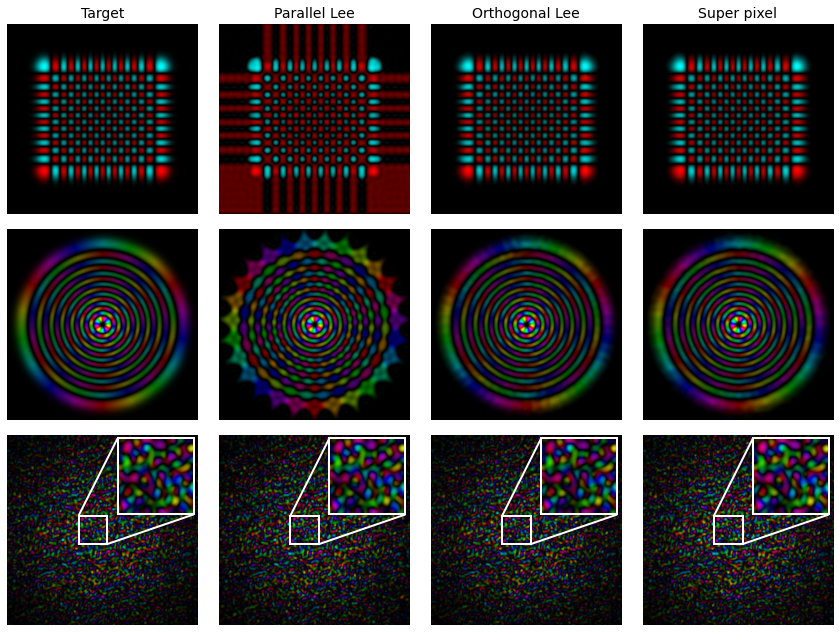

In [14]:
fig, axs = plt.subplots(3,4, figsize=(12,9))
titles = ['Target', 'Parallel Lee', 'Orthogonal Lee', 'Super pixel']
for fi in range(3):
    for hi in range(3):
        if fi==0:
            axs[0,hi+1].set_title(titles[hi+1])
        if fi==2:
            plot_fieldWzoom(shaped_list[fi][hi], ax=axs[fi,hi+1], rz=0.075, xyzoom=[0.45,0.5])
        else:
            axs[fi,hi+1].imshow(colorize(shaped_list[fi][hi]))
            axs[fi,hi+1].axis('off')
    
    if fi==2:
        plot_fieldWzoom(field_list[fi], ax=axs[fi,0], rz=0.075, xyzoom=[0.45,0.5]) 
    else:
        axs[fi,0].imshow(colorize(field_list[fi]))
        axs[fi,0].axis('off')
    if fi==0:
        axs[0,0].set_title(titles[0])
fig.tight_layout()

## 4. Lower amplitude modulation

First we define the period of the grating and compute the LUT 

In [15]:
px = 3
nuvec = np.array((1/px,1/px**2)) 
f_val, px_comb, lut = generate_lut('sp', px)

Then we compute the holograms reseting the maximum amplitude

In [16]:
max_val = 0.25
holo_list = []
for f in field_list:
    holo_list += [[parallel_lee(max_val*f, nuvec=nuvec, renorm=False),
                   orthogonal_lee(max_val*f, nuvec=nuvec, renorm=False),
                   holo_SP(max_val*f, lut, px_comb, ds_method='mean', renorm=False)]]

Then we compute the shaped fields

In [17]:
shaped_list = []
for fi in range(len(field_list)):
    temp_list = []
    for hi in range(3):
        sh_f, _ = fourier_filter(holo_list[fi][hi], nuvec, SA_filters[fi])
        temp_list += [sh_f]
    shaped_list += [temp_list]

Finally we plot the results

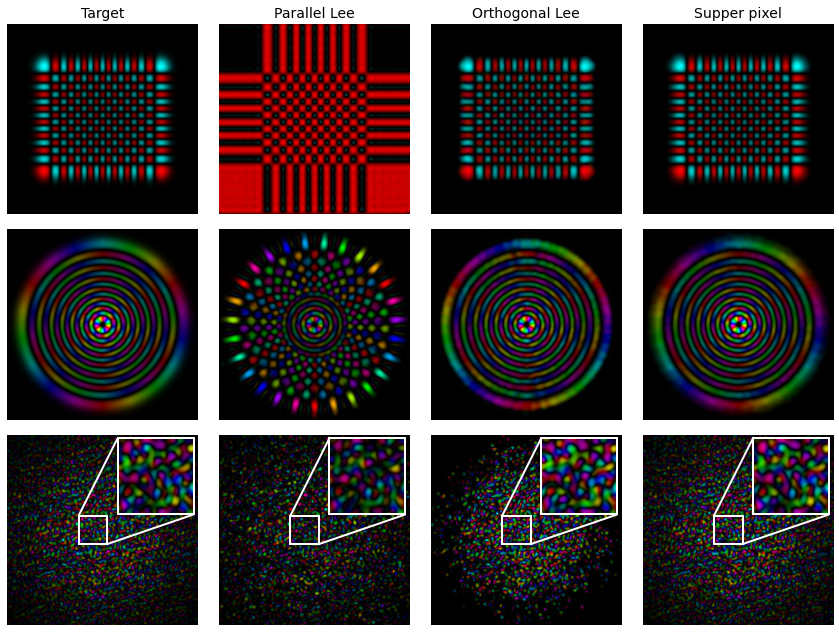

In [18]:
fig, axs = plt.subplots(3,4, figsize=(12,9))
titles = ['Target', 'Parallel Lee', 'Orthogonal Lee', 'Supper pixel']
for fi in range(3):
    for hi in range(3):
        if fi==0:
            axs[0,hi+1].set_title(titles[hi+1])
        if fi==2:
            plot_fieldWzoom(shaped_list[fi][hi], ax=axs[fi,hi+1], rz=0.075, xyzoom=[0.45,0.5])
        else:
            axs[fi,hi+1].imshow(colorize(shaped_list[fi][hi]))
            axs[fi,hi+1].axis('off')
    
    if fi==2:
        plot_fieldWzoom(field_list[fi], ax=axs[fi,0], rz=0.075, xyzoom=[0.45,0.5]) 
    else:
        axs[fi,0].imshow(colorize(field_list[fi]))
        axs[fi,0].axis('off')
    if fi==0:
        axs[0,0].set_title(titles[0])
fig.tight_layout()